# Gaming Stocks Analysis
---

## Author Information

Name : Darryn Johnson

Date last updated : 11/28/2024

---
## Sources and Links

Original Kaggle dataset : [Video Game Stocks: Financial Market Data](https://www.kaggle.com/datasets/datadrivenx/video-game-stocks-financial-market-data)

---
# Overview

---
# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('gaming_stocks.zip')

---
# Reproducability

To reproduce these results yourself, open google colab and locate this github repo under my github account. From there, simply run the notebook from start to finish.

In [3]:
# !kaggle datasets download -d datadrivenx/video-game-stocks-financial-market-data
# !unzip datadrivenx/video-game-stocks-financial-market-data

---
# Business Understanding 

The purpose of the following notebook is to look into patters in the stock market ragerding gaming tech companies. This is valuable to shareholders and investors as it gives insigt to the iner-workings of this specific field, and can inform a decision.

- Business Objectives
    - analize stock data to locate a trend
- Situation Assesement
    - resources available
        - stock opening/closing prices, trading volume, and other relevant financial indicators
    - resources unavailable
        - undisclosed internal information such as :
            - upcoming unanounced releases
            - internal stresses that may cause unpredictable outcomes
- Data Mining Goal
    - assess and understand the data provided
- Project plan
    - produce accurate and usable metrics to inform a decision regarding stock market investments

---
# Data Understanding 
Let's take a quick look into what the data we are working with actually is. In this case, we have metadata, which is just data about the data.  

## Column Metadata

- Company
    - The name of the video game company
- Ticker Symbol
    - The stock's unique symbol used for trading
- Currency
    - The currency used for the stock's price
        - USD - United States Dollar | 1 : 1 USD
            - Microsoft Gaming
            - Electronic Arts
            - Take Two interactive
            - NetEase Games
            - Roblox Corporation
            - Nintendo
            - Playtika
        - JPY - Japanese Yen | 1 JPY : 0.0067 USD
            - Sony Interactive Entertainment
        - HKD - Hong Kong Dollar | 1 HKD : 0.13 USD
            - Tencent Interactive Entertainment
        - SEK - Swedish Krona | 1 SEK : 0.092 USD
            - Embracer Group
- Open
    - The stock price at market open for the given day
- High
    - The highest stock price during the trading day
- Low
    - The lowest stock price during the trading day
- Close
    - The stock price at market close for the given day
- Adj Close
    - The adjusted closing price, accounting for dividends and stock splits
        - dividends
            - a payment to a shareholder with additional stocks rather then money
        - stock splits
            - spliting owned stocks into smaller subsets, while maintaining the overall value of the stocks 
- Volume
    - The total number of shares traded during the day

## Note From Original Dataset Creator

While _Epic Games_ and _MiHoYo_ are also major players in the video game industry, and would have ranked no. 7 and 10 respectively, they are privately held and do not have publicly traded stocks, so their financial data is not included in this dataset.

The dataset contains monthly data for the period from January 1, 2000, to October 31, 2024. The data was extracted using the Yahoo Finance library in Python, and includes key market metrics such as stock opening/closing prices, trading volume, and other relevant financial indicators.

---
# Data Distribution

---
# Data Preparation

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['year'] = df['Date'].dt.year

## Conversion Column Creation

In [6]:
df['Open Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Open Value in USD'] = row['Open']

In [7]:
df['High Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'High Value in USD'] = row['High'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'High Value in USD'] = row['High'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'High Value in USD'] = row['High'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'High Value in USD'] = row['High']

In [8]:
df['Low Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Low Value in USD'] = row['Low'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Low Value in USD'] = row['Low'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Low Value in USD'] = row['Low'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Low Value in USD'] = row['Low']

In [9]:
df['Close Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Close Value in USD'] = row['Close'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Close Value in USD'] = row['Close'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Close Value in USD'] = row['Close'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Close Value in USD'] = row['Close']

In [10]:
df['Adj Close in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Adj Close in USD'] = row['Adj Close'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Adj Close in USD'] = row['Adj Close'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Adj Close in USD'] = row['Adj Close'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Adj Close in USD'] = row['Adj Close']

---
## Methodology

---
# Functions

In [11]:
def value_calc(company, col):
    '''
    This function takes in 2 arguments, what company you want, and what col to sum.

    example : (Nintendo, Open)

    requirments : company input must str, col input must be str.
    '''
    
    d_frame = df[df['Company'] == company]
    print(sum(d_frame[col]))

In [12]:
def get_year_val(year1, year2, company, col):
    '''
    this function takes the year, company, and column and outputs the total values for that year, compared to another given year.
    requirments : year(int), company(str) and col(str)
    formula for percent calculation : 
        percent = ((final value - initial value) / inital value) * 100
    '''
    # year 1
    comp = df[df['Company'] == company]
    y1 = comp[comp['year'] == year1]
    final = round(y1[col].sum(), 2)
    
    # year 2
    y2 = comp[comp['year'] == year2]
    init = round(y2[col].sum(), 1)

    percent = round(((final - init) / init) * 100, 2) # get percent values
    
    # if statments to alter context at end of sentince 
    if percent > 0:
        difference = 'gain'
    elif percent < 0:
        difference = 'loss'
    else:
        difference = 'change'

    return f'For {company}, the year of {year1} had the {col} value of {final}, {year2} had the {col} value of {init}, resulting in a {percent}% {difference}' 

In [13]:
def get_year_avg(start, end, company, col):
    '''
    This function takes in a start and end year, company name and what column to act upon, and returns the average value of said column between the given years.

    requirments : start & end year(int), company(str) and col(str)
    '''
    
    end_p = end + 1 # this variable accounts for the range function being non inclusive
    comp = df[df['Company'] == company] # create df with only given company
    r_1 = range(start, end_p) # create range object to devide by later
    
    df_list = [] # create empty list to append values to
    
    # this for loop iterates through the given df and the rows within, appending the rows with the given year range to df_list
    for ind, row in comp.iterrows():
        for r in range(start, end_p):
            if row.iloc[10] == r:
                df_list.append(row)
                df_list_1 = pd.DataFrame(df_list)
                output = round(df_list_1[col].sum(), 2)
                length = len(r_1)
                avg = round(output / length, 2)
    return f'From the years of {start} to {end}, {company} close values has had an average of {avg} per year'

In [14]:
def plot_val(df, col):
    
    df_ = df
    comp_dict = {}
    
    for ind, row in df_.iterrows():

        key = row['Company']
        value = row[col]

        if key not in comp_dict:
            comp_dict[key] = 0
        comp_dict[key] += value

    sorted_dict = dict(sorted(comp_dict.items(), reverse = True, key = lambda item : item[1]))
    
    k = list(sorted_dict.keys())
    v = list(sorted_dict.values())

    if 'USD' in col:
        conv = ''
        x_label = 'Values in USD' 
    else:
        conv = 'values Before Conversion'
        x_label = f'{col} values in respective currencies'
    fig, ax = plt.subplots()
    
    plt.barh(k, v)
    plt.title(f'{col} {conv}')
    ax.set_xlabel(x_label)
    ax.get_xaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
    plt.show();    

---
# Company Breakdowns

## Microsoft Gaming

[Microsoft Gaming](https://en.wikipedia.org/wiki/Microsoft_Gaming) is a multinational division of [Microsoft](https://en.wikipedia.org/wiki/Microsoft) based out of Redmond, Washington. Microsoft Gaming itself is made up of other developers and publishers including but not limited to : Xbox Game Studios, Bethesda Softworks (publisher of ZeniMax Media), Activision, Blizzard Entertainment, and King (the latter three are publishers of Activision Blizzard). Before Microsoft made the acquisitions mentioned above, their gaming division was known as [Microsoft Game Studios](https://en.wikipedia.org/wiki/Xbox_Game_Studios) (MGS). The name of the division was changed in 2022 to envelop the newly purchased studios under one umbrella. Upon the finalizing of the purchase of [Activion Blizzard](https://en.wikipedia.org/wiki/Activision_Blizzard), which itself includes many smaller studios such as [Treyarch](https://en.wikipedia.org/wiki/Treyarch) and [Infinity Ward](https://en.wikipedia.org/wiki/Infinity_Ward), Microsft Gaming became one of the worlds largest gaming companies, only rivaled by companies such as Sony, Nintendo and Tencent. Microsft is known for several AAA games such as the Halo series, Flight Simulator and Gears of War. Now that Microsft Gaming has largely expanded its reach with the acquisitons mentions above, they now are associated with some of the biggest games in the world, such as Call of Duty, the Warcraft series, Minecraft and Candy Crush. The addition of these extremely profitable and popular games (on top of Microsoft already making gaming consoles and computers)no doubt adds much interest into the stock associated with this company. 

Let's look into how Microsft Gaming has evolved over the years reagrding stock info and the related first party releases and projects they have released to the public.

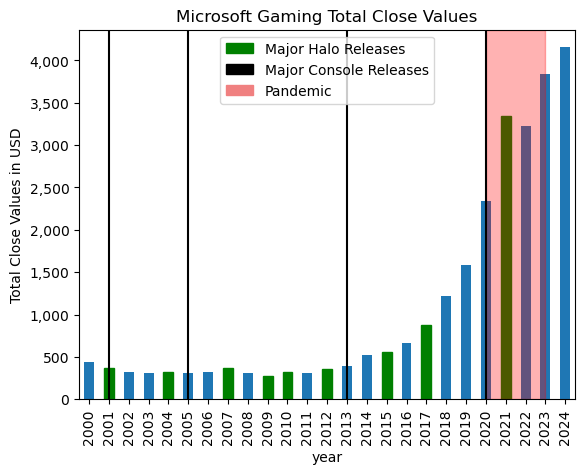

In [15]:
fig, ax = plt.subplots()

micro = df[df['Company'] == 'Microsoft Gaming'].copy()
micro_sort = micro.groupby('year')['Close'].sum()
ax = micro_sort.plot(kind = 'bar')

# halo release dates
ax.patches[1].set_color('g')
ax.patches[4].set_color('g')
ax.patches[7].set_color('g')
ax.patches[9].set_color('g')
ax.patches[10].set_color('g')
ax.patches[12].set_color('g')
ax.patches[15].set_color('g')
ax.patches[17].set_color('g')
ax.patches[21].set_color('g')

# console release dates
ax.axvline([1], color = 'k')
ax.axvline([5], color = 'k')
ax.axvline([13], color = 'k')
ax.axvline([20], color = 'k')

# pandemic
plt.axvspan(20, 23, color = 'r', alpha = 0.3)

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

#legend creation
halo_release = mpatches.Patch(color = 'g', label = 'Major Halo Releases')
console_release = mpatches.Patch(color = 'k', label = 'Major Console Releases')
pandemic = mpatches.Patch(color = 'lightcoral', label = 'Pandemic')

#labels
ax.set_title('Microsoft Gaming Total Close Values')
ax.set_ylabel('Total Close Values in USD')

#output
plt.legend(handles = [halo_release, console_release, pandemic])
plt.show();

Here we can see the total close values per year. From 2000 to 2015 we can see minimal growth, even in the years where a Halo game was released or when a new console generation is started. However, this pattern breaks in 2020, with a large increase of closing stock values for that year. This can clearly be attributed to the pandemic, where a large portion of the world was quarantined, resulting in a spike in home intertainment with gaming receiving a huge boost in popularity. This resulted in the close values for Microsoft Gaming rising by 47%.

In [16]:
get_year_val(2020, 2019, 'Microsoft Gaming', 'Close')

'For Microsoft Gaming, the year of 2020 had the Close value of 2335.75, 2019 had the Close value of 1588.3, resulting in a 47.06% gain'

During the pandemic, from the years 2020 to 2023, Microsoft Gaming had an increase of 64% in closing stock values. This is a major increase in such a short amount of time, especially when compared to the 

In [17]:
get_year_avg(2020, 2023, 'Microsoft Gaming', 'Close')

'From the years of 2020 to 2023, Microsoft Gaming close values has had an average of 3184.14 per year'

---
# Exploritory Data Analysis (EDA)

In [18]:
df.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume,year,Open Value in USD,High Value in USD,Low Value in USD,Close Value in USD,Adj Close in USD
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000,2000,0.191117,0.195431,0.139695,0.16951,0.097385
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000,2000,0.169468,0.210883,0.1675,0.210045,0.120673
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000,2000,0.20167,0.20971,0.14539,0.187684,0.107826
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000,2000,0.189275,0.189275,0.149494,0.151169,0.086929
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500,2000,0.15209,0.157324,0.118925,0.122191,0.070266


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2209 non-null   datetime64[ns]
 1   Company             2209 non-null   object        
 2   Ticker Symbol       2209 non-null   object        
 3   Currency            2209 non-null   object        
 4   Open                2209 non-null   float64       
 5   High                2209 non-null   float64       
 6   Low                 2209 non-null   float64       
 7   Close               2209 non-null   float64       
 8   Adj Close           2209 non-null   float64       
 9   Volume              2209 non-null   int64         
 10  year                2209 non-null   int32         
 11  Open Value in USD   2209 non-null   object        
 12  High Value in USD   2209 non-null   object        
 13  Low Value in USD    2209 non-null   object      

In [20]:
df['Company'].value_counts()

Company
Sony Interactive Entertainment       298
Microsoft Gaming                     298
Nintendo                             298
Electronic Arts                      298
Take-Two Interactive                 298
NetEase Games                        292
Tencent Interactive Entertainment    244
Embracer Group                        95
Playtika                              45
Roblox Corporation                    43
Name: count, dtype: int64

In [21]:
df['Currency'].value_counts()

Currency
USD    1572
JPY     298
HKD     244
SEK      95
Name: count, dtype: int64

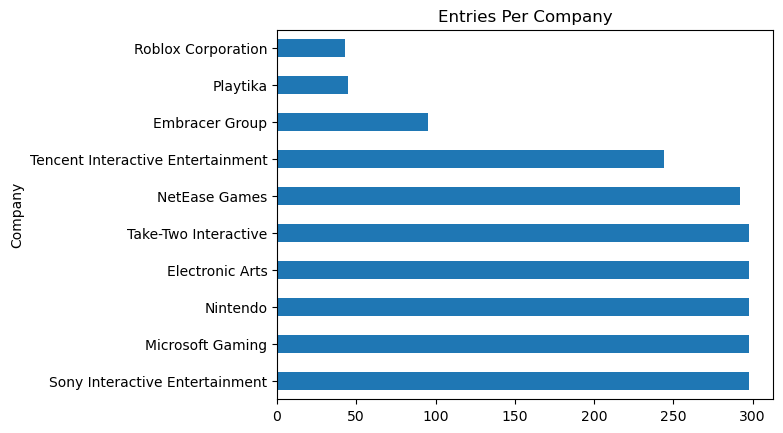

In [22]:
fig, ax = plt.subplots()
df['Company'].value_counts().plot(kind = 'barh')
ax.set_title('Entries Per Company')
plt.show();

---
## Open Values

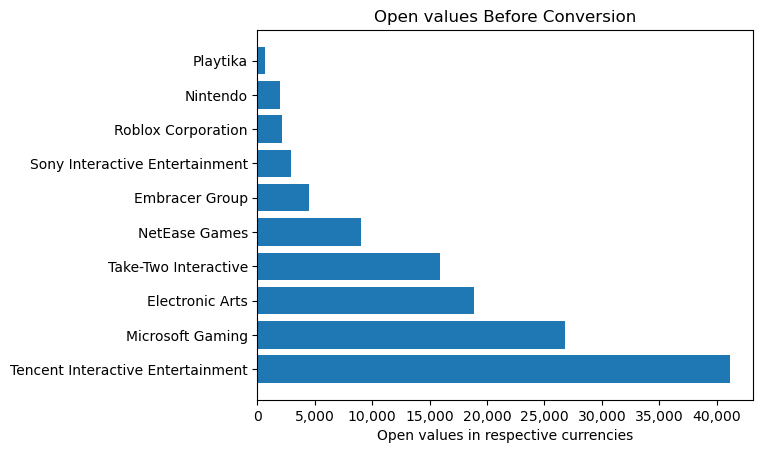

In [23]:
plot_val(df, 'Open')

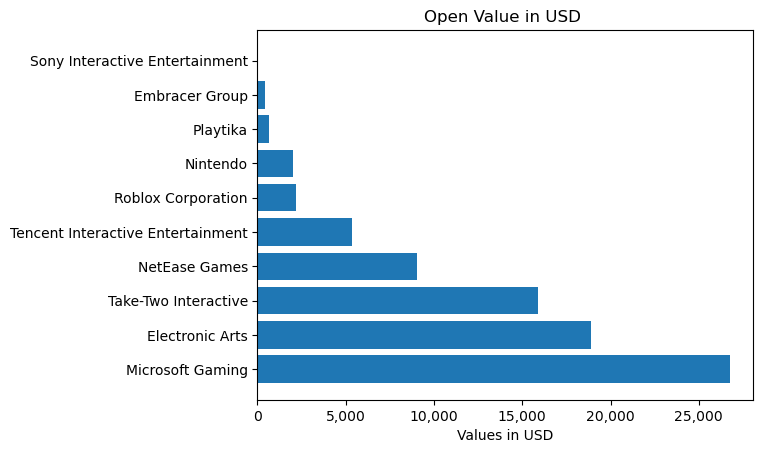

In [24]:
plot_val(df, 'Open Value in USD')

AttributeError: 'Axes' object has no attribute 'plot_val'

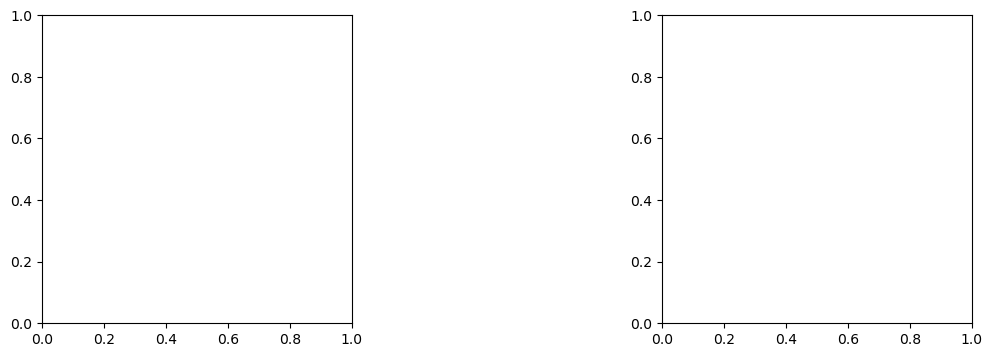

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
plt.subplots_adjust(wspace = 1)

g_0 = ax[0].plot_val(df, 'Open')
g_0[0].set_color('b')
g_0[1].set_color('g')
g_0[2].set_color('k')
g_0[3].set_color('y')
g_0[4].set_color('darkred')
g_0[5].set_color('saddlebrown')
g_0[7].set_color('gray')
g_0[8].set_color('crimson')
g_0[9].set_color('orangered')
ax[0].set_title('Open Values Before Conversion')
ax[0].set_xlabel('Open Values (in Respective Currencies)')

g_1 = ax[1].barh(plot_val(df, 'Open Value in USD'))
g_1[0].set_color('g')
g_1[1].set_color('k')
g_1[2].set_color('y')
g_1[3].set_color('darkred')
g_1[4].set_color('b')
g_1[5].set_color('gray')
g_1[6].set_color('crimson')
g_1[7].set_color('orangered')
g_1[8].set_color('saddlebrown')
ax[1].set_title('Open Values After Conversion (USD)')
ax[1].set_xlabel('Open Values (in USD)')

ax[0].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

ax[1].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

fig.suptitle('Graphs Comparing Before & After Conversion (Open Value)')
plt.show();

---
## High Values

In [ ]:
plot_val(df, 'High')

In [ ]:
plot_val(df, 'High Value in USD')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
plt.subplots_adjust(wspace = 1)

g_0 = ax[0].barh(x_high, high_height, tick_label = labels_high)
g_0[0].set_color('b')
g_0[1].set_color('g')
g_0[2].set_color('k')
g_0[3].set_color('y')
g_0[4].set_color('darkred')
g_0[5].set_color('saddlebrown')
g_0[7].set_color('gray')
g_0[8].set_color('crimson')
g_0[9].set_color('orangered')
ax[0].set_title('High Values Before Conversion')
ax[0].set_xlabel('High Values (in Respective Currencies)')

g_1 = ax[1].barh(high_x_2, high_height_2, tick_label = high_labels_2)
g_1[0].set_color('g')
g_1[1].set_color('k')
g_1[2].set_color('y')
g_1[3].set_color('darkred')
g_1[4].set_color('b')
g_1[5].set_color('gray')
g_1[6].set_color('crimson')
g_1[7].set_color('orangered')
g_1[8].set_color('saddlebrown')
ax[1].set_title('High Values After Conversion (USD)')
ax[1].set_xlabel('High Values (in USD)')

ax[0].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

ax[1].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

fig.suptitle('Graphs Comparing Before & After Conversion (High Value)')
plt.show();

---
## Low Values

In [ ]:
plot_val(df, 'Low')

In [ ]:
plot_val(df, 'Low Value in USD')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
plt.subplots_adjust(wspace = 1)

g_0 = ax[0].barh(low_x, low_height, tick_label = low_labels)
g_0[0].set_color('b')
g_0[1].set_color('g')
g_0[2].set_color('k')
g_0[3].set_color('y')
g_0[4].set_color('darkred')
g_0[5].set_color('saddlebrown')
g_0[7].set_color('crimson')
g_0[8].set_color('gray')
g_0[9].set_color('orangered')
ax[0].set_title('Low Values Before Conversion')
ax[0].set_xlabel('Low Values (in Respective Currencies)')

g_1 = ax[1].barh(low_x_2, low_height_2, tick_label = low_labels_2)
g_1[0].set_color('g')
g_1[1].set_color('k')
g_1[2].set_color('y')
g_1[3].set_color('darkred')
g_1[4].set_color('b')
g_1[5].set_color('crimson')
g_1[6].set_color('gray')
g_1[7].set_color('orangered')
g_1[8].set_color('saddlebrown')
ax[1].set_title('Low Values After Conversion (USD)')
ax[1].set_xlabel('Low Values (in USD)')

ax[0].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

ax[1].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

fig.suptitle('Graphs Comparing Before & After Conversion (Low Value)')
plt.show();

---
## Close Values

In [ ]:
plot_val(df, 'Close')

In [ ]:
plot_val(df, 'Close Value in USD')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
plt.subplots_adjust(wspace = 1)

g_0 = ax[0].barh(close_x, close_height, tick_label = close_labels)
g_0[0].set_color('b')
g_0[1].set_color('g')
g_0[2].set_color('k')
g_0[3].set_color('y')
g_0[4].set_color('darkred')
g_0[5].set_color('saddlebrown')
g_0[7].set_color('gray')
g_0[8].set_color('crimson')
g_0[9].set_color('orangered')
ax[0].set_title('Close Values Before Conversion')
ax[0].set_xlabel('Close Values (in Respective Currencies)')

g_1 = ax[1].barh(close_x_2, close_height_2, tick_label = close_labels_2)
g_1[0].set_color('g')
g_1[1].set_color('k')
g_1[2].set_color('y')
g_1[3].set_color('darkred')
g_1[4].set_color('b')
g_1[5].set_color('gray')
g_1[6].set_color('crimson')
g_1[7].set_color('orangered')
g_1[8].set_color('saddlebrown')
ax[1].set_title('Close Values After Conversion (USD)')
ax[1].set_xlabel('Close Values (in USD)')

ax[0].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

ax[1].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

fig.suptitle('Graphs Comparing Before & After Conversion (Close Value)')
plt.show();

---
## Adjusted Close

In [ ]:
plot_val(df, 'Adj Close')

In [ ]:
plot_val(df, 'Adj Close in USD')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
plt.subplots_adjust(wspace = 1)

g_0 = ax[0].barh(adj_x, adj_height, tick_label = adj_labels)
g_0[0].set_color('b')
g_0[1].set_color('g')
g_0[2].set_color('k')
g_0[3].set_color('y')
g_0[4].set_color('darkred')
g_0[5].set_color('saddlebrown')
g_0[7].set_color('gray')
g_0[8].set_color('crimson')
g_0[9].set_color('orangered')
ax[0].set_title('Adj Close Values Before Conversion')
ax[0].set_xlabel('Adj Close Values (in Respective Currencies)')

g_1 = ax[1].barh(adj_x_2, adj_height_2, tick_label = adj_labels_2)
g_1[0].set_color('g')
g_1[1].set_color('k')
g_1[2].set_color('y')
g_1[3].set_color('darkred')
g_1[4].set_color('b')
g_1[5].set_color('gray')
g_1[6].set_color('crimson')
g_1[7].set_color('orangered')
g_1[8].set_color('saddlebrown')
ax[1].set_title('Adj Close Values After Conversion (USD)')
ax[1].set_xlabel('Adj Close Values (in USD)')

ax[0].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

ax[1].get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

fig.suptitle('Graphs Comparing Before & After Conversion (Adj Close)')
plt.show();

---
## Volume

In [ ]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots()

df_vol = df.sort_values('year')
ax.bar(df_vol['year'], df_vol['Volume'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
plt.show();

In [ ]:
entries_per_year = df.groupby('year').size()

fig, ax = plt.subplots()

ax.set_title('Entries per Year')
ax.set_ylabel('Entries')
avg = sum(entries_per_year) / len(entries_per_year)
ax.axhline(avg, color = 'r')
entries_per_year.plot(kind = 'bar')
plt.legend(['Average'])
plt.show();

In [ ]:
print(avg)

In [ ]:
df_micro = df[df['Company'] == 'Microsoft Gaming']

fig, ax = plt.subplots()

x = df_micro['year']
y = df_micro['Volume']
ax.set_title('Microsoft Gaming Volume by year')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
ax.bar(x, y)
plt.show();

In [ ]:
df_micro.head()